# Problem Set 1

* Introductory Examples
* Julia Essentials

## Introductory Examples

In [1]:
using InstantiateFromURL
# optionally add arguments to force installation: instantiate = true, precompile = true
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.8.0")

Activated /Users/taisei/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.8.0


In [45]:
using LinearAlgebra, Statistics,Plots

#### Exercise 7

In [34]:
function ex_7(α,s=100;σ=0.2,tmax=200,a=0)
    fpt_vec=zeros(s)
    for m in 1:s
        x=zeros(tmax+1)
        abovetime=zeros(0)
        x[1]=1
        for t in 1:tmax
            x[t+1]=α*x[t]+σ*randn()
            if x[t+1]<a
                push!(abovetime,t+1)
            end
        end
        push!(abovetime,tmax)
        fpt_vec[m]=abovetime[1]
    end
    return histogram(fpt_vec,label="α=$α",bins=1:201)
end

ex_7 (generic function with 2 methods)

  0.004246 seconds (22.11 k allocations: 2.044 MiB)


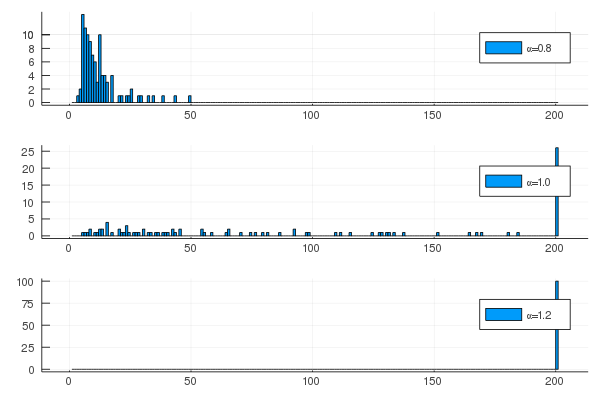

In [35]:
@time plot(ex_7(0.8),ex_7(1.0),ex_7(1.2),layout=(3,1))

#### Modification: try not to vectorize `abovetime`(quit if it reaches the threshold)

In [36]:
function ex_7_2(α,s=100;σ=0.2,tmax=200,a=0)
    fpt_vec=zeros(s)
    for m in 1:s
        x=1
        t=0
        while x>a&&t<=tmax
            x=α*x+σ*randn()
            t+=1
        end
            fpt=t
        fpt_vec[m]=fpt
    end
    return histogram(fpt_vec,label="α=$α",bins=1:201)
end

ex_7_2 (generic function with 2 methods)

  0.004317 seconds (22.08 k allocations: 2.031 MiB)


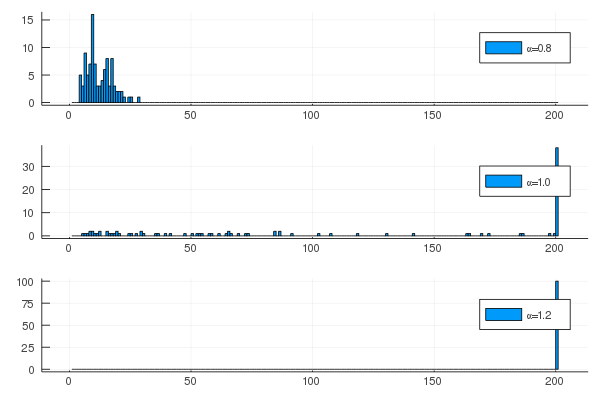

In [37]:
@time plot(ex_7(0.8),ex_7(1.0),ex_7(1.2),layout=(3,1))

In [ ]:
# good style
function fixedpointmap(f; iv, tolerance=1E-7, maxiter=1000)
    # setup the algorithm
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (value = x_old, normdiff=normdiff, iter=iter) # A named tuple
end

# define a map and parameters
p = 1.0
β = 0.9
f(v) = p + β * v # note that p and β are used in the function!

sol = fixedpointmap(f, iv=0.8, tolerance=1.0E-8) # don't need to pass
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter)"*
        " iterations")

#### Exercise 8(a)

In [42]:
function ex_8a(gen,gen_prime; x_0=0, tolerance=1E-7, maxiter=1000)
    # setup the algorithm
    x_old = x_0
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = x_old-gen(x_old)/gen_prime(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter+= 1
    end
    return (value = x_old, normdiff=normdiff, iter=iter) # A named tuple
end

ex_8a (generic function with 1 method)

In [44]:
f(x) = (x-1)^3
f_prime(x)=3*(x-1)^2

@time sol = ex_8a(f,f_prime) # don't need to pass
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter)"*
        " iterations")

  0.000013 seconds (4 allocations: 96 bytes)
Fixed point = 0.9999998643434097, and |f(x) - x| = 6.782829509166532e-8 in 40 iterations


#### Exercise 8 (b)

In [48]:
using ForwardDiff

# example usage: create a function and get the derivative
g(x) = x^2
g_prime = x -> ForwardDiff.derivative(f, x)

g(0.1),g_prime(0.1)

(0.010000000000000002, 0.2)

In [50]:
using ForwardDiff
function ex_8b(gen; x_0=0, tolerance=1E-7, maxiter=1000)
    # setup the algorithm
    x_old = x_0
    normdiff = Inf
    iter = 1
    gen_prime=x->ForwardDiff.derivative(gen,x)
    while normdiff > tolerance && iter <= maxiter
        x_new = x_old-gen(x_old)/gen_prime(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter+= 1
    end
    return (value = x_old, normdiff=normdiff, iter=iter) # A named tuple
end

ex_8b (generic function with 1 method)

In [52]:
f(x) = (x-1)^3
@time sol = ex_8b(f) # don't need to pass
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter)"*
        " iterations")

  0.000010 seconds (4 allocations: 96 bytes)
Fixed point = 0.9999998643434097, and |f(x) - x| = 6.782829509166532e-8 in 40 iterations


## Julia Essentials

In [53]:
#Recap:Exercise 5
function linapprox(f, a, b, n, x)
    # evaluates the piecewise linear interpolant of f at x,
    # on the interval [a, b], with n evenly spaced grid points.

    length_of_interval = b - a
    num_subintervals = n - 1
    step = length_of_interval / num_subintervals

    # find first grid point larger than x
    point = a
    while point ≤ x
        point += step
    end

    # x must lie between the gridpoints (point - step) and point
    u, v = point - step, point

    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)
end


linapprox (generic function with 1 method)

In [54]:
f_ex5(x) = x^2
g_ex5(x) = linapprox(f_ex5, -1, 1, 3, x)

g_ex5 (generic function with 1 method)

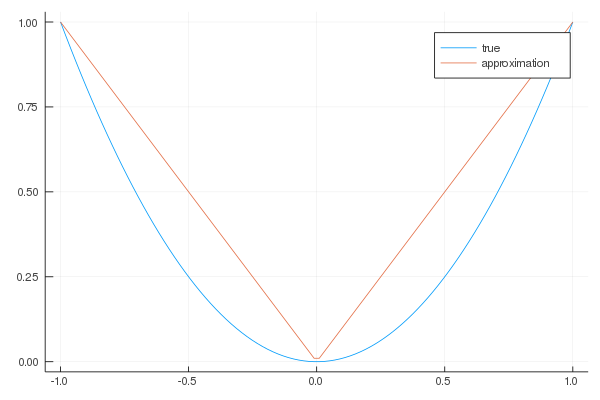

In [55]:
x_grid = range(-1.0, 1.0, length = 100)
y_vals = f_ex5.(x_grid)
y = g_ex5.(x_grid)
plot(x_grid, y_vals, label = "true")
plot!(x_grid, y, label = "approximation")

#### Exercise 7

In [61]:
function linapprox_ex7(f,nodes,x)

    s= step(nodes)
    point = nodes[1]
    while point ≤ x
        point += s
    end
    u, v = point - s, point

    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)
end

linapprox_ex7 (generic function with 1 method)

In [62]:
range1=-1.0:0.5:1.0
f_ex5(x) = x^2
g_ex7(x) = linapprox_ex7(f_ex5, range1,x)

g_ex7 (generic function with 1 method)

  0.000989 seconds (3.67 k allocations: 265.234 KiB)


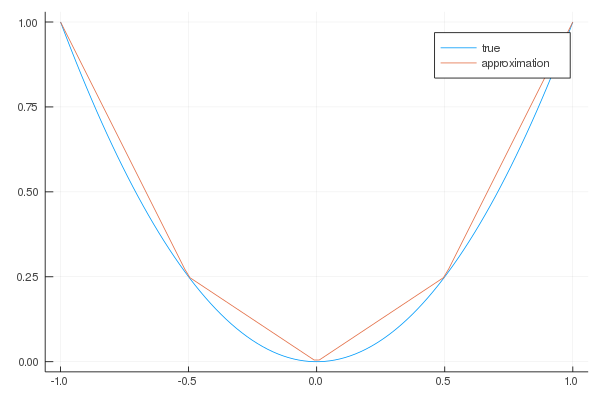

In [64]:
@time begin
x_grid = range(-1.0, 1.0, length = 100)
y_vals = f_ex5.(x_grid)
y = g_ex7.(x_grid)
plot(x_grid, y_vals, label = "true")
plot!(x_grid, y, label = "approximation")
end